在论文《含周期变动项的预测模型的建立与应用》中，提到：

对任何一个时间序列，都可以分为趋势项+周期项+随机因子。

以趋势项+周期项+随机因子为方向，进行预测。

文中的方法是简单的线性LR方法，但是在我们的数据集中，简单的线性条件必然不满足情况（由花开测试，LR效果并不好）

如果用论文中提到的模型，先要提取出车流量的趋势项yt,然后用线性回归求yt与各个属性的函数关系，然后用文章中的公式3和5求出a,b和隐含周期，首先假定一系列频率值，然后a和b是由给定的一个频率值得到，如果a和b的平方和接近于0，那么说明该序列不存在该频率，如果是O（n）说明该频率是对的，这样就得到了整个模型。

在这里，推荐使用AdaBoost的Regression模型，Here is the example.

Automatically created module for IPython interactive environment


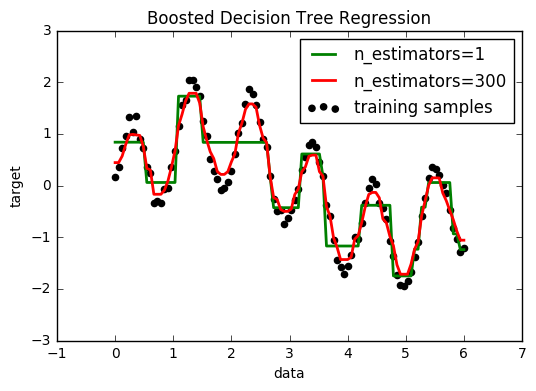

In [1]:
print(__doc__)

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()